# 1 

A theoretical Simple Linear Regression is model that uses a linear equation to estimate the relationship between a dependent and an independent variable. it has the form 
yi = beta_null + beta_one * xi + error
where yi is the estimated dependent variable
beta_null is the y intercept
beta_one is the slop
xi is the independent variable
error represents the part of the dependent varibales that are not explained by the linear regression model

in linear regression, it is assumed that the error term follows a normal distrinution with mean at zero and some variance, which implies that the difference between the actual value and the predicted value is normally distributed




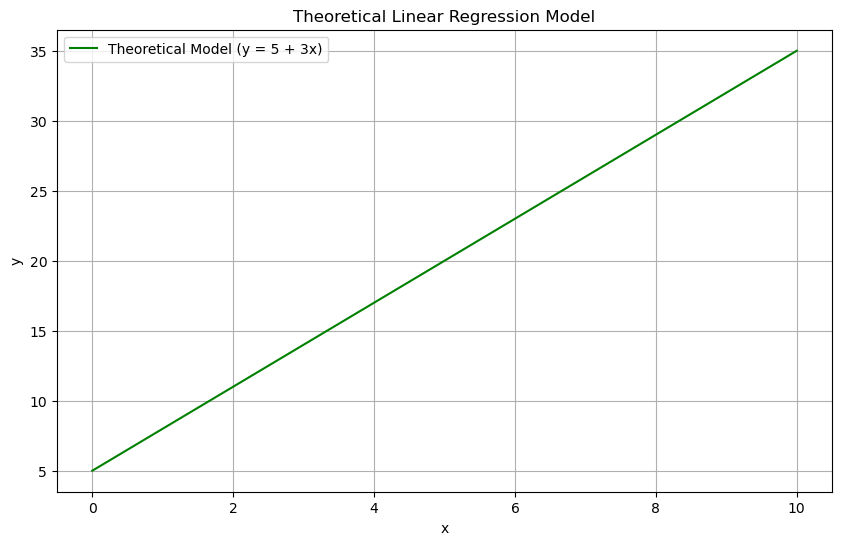

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the theoretical model parameters
beta_0 = 5   # Intercept
beta_1 = 3   # Slope

# Generate the predictor variable (x)
x = np.linspace(0, 10, 100)  # 100 points from 0 to 10

# Define the response variable (y) using the theoretical model without noise
y_theoretical = beta_0 + beta_1 * x

# Plot the theoretical model
plt.figure(figsize=(10, 6))
plt.plot(x, y_theoretical, color='green', label='Theoretical Model (y = 5 + 3x)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Theoretical Linear Regression Model")
plt.legend()
plt.grid(True)
plt.show()


Chatgpt summary/link
Here’s a summary of our chat:

Error Term in Linear Regression: We discussed the error term in linear regression, which represents the difference between actual and predicted values. This term accounts for unobserved factors affecting the dependent variable.

Sample from Normal Distribution: I explained that in a linear regression model, assuming a normally distributed error term leads to a normally distributed dependent variable around the predicted values for each observation. This allows for statistical inference in linear regression.

Creating a Fitted Model: We created a fitted linear regression model using numpy and scipy.stats, generated synthetic data with known parameters, and fitted a model to approximate these parameters. We clarified that this is a fitted model, based on sample data, rather than a theoretical model.

Theoretical Model Visualization: We then visualized a theoretical linear regression model by plotting a straight line using known parameters without any random noise, to show the true underlying relationship between 
𝑥
x and 
𝑦
y.

Simulating and Fitting a Model with statsmodels: Finally, we simulated data from the theoretical model and used pandas and statsmodels to fit a simple linear regression model. We displayed a summary of the model and plotted the observed data, fitted line, and theoretical model line to compare. This demonstrated how the fitted model approximates the theoretical relationship in practice.

https://chatgpt.com/share/6721523a-7e38-8010-b34a-03f5cf0bf654

# 2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     2343.
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           3.12e-70
Time:                        21:22:52   Log-Likelihood:                -200.97
No. Observations:                 100   AIC:                             405.9
Df Residuals:                      98   BIC:                             411.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6544      0.362     12.856      0.0

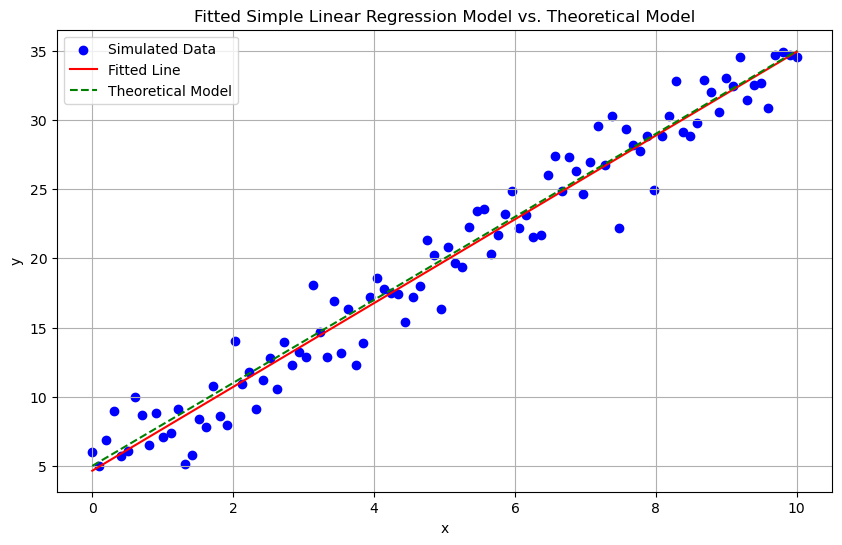

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Step 1: Simulate a dataset from the theoretical model
np.random.seed(42)  # For reproducibility

# Define parameters for the theoretical model
beta_0 = 5         # Intercept
beta_1 = 3         # Slope
sigma = 2          # Standard deviation of the error term
n_samples = 100    # Number of data points

# Generate predictor variable x
x = np.linspace(0, 10, n_samples)

# Generate normally distributed errors
error = np.random.normal(0, sigma, n_samples)

# Generate response variable y based on the theoretical model
y = beta_0 + beta_1 * x + error

# Step 2: Create a pandas DataFrame
data = pd.DataFrame({'x': x, 'y': y})

# Step 3: Fit a Simple Linear Regression model using statsmodels
model = smf.ols('y ~ x', data=data).fit()

# Step 4: Display model summary to see the fitted parameters and statistics
print(model.summary())

# Step 5: Visualize the dataset and the fitted regression line
# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y'], color='blue', label='Simulated Data')

# Plot the fitted regression line
plt.plot(data['x'], model.predict(data), color='red', label='Fitted Line')

# Plot the theoretical model line for reference
plt.plot(x, beta_0 + beta_1 * x, color='green', linestyle='--', label='Theoretical Model')

# Labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fitted Simple Linear Regression Model vs. Theoretical Model")
plt.legend()
plt.grid(True)
plt.show()


chatgpt link:
https://chatgpt.com/share/6721523a-7e38-8010-b34a-03f5cf0bf654

# 3

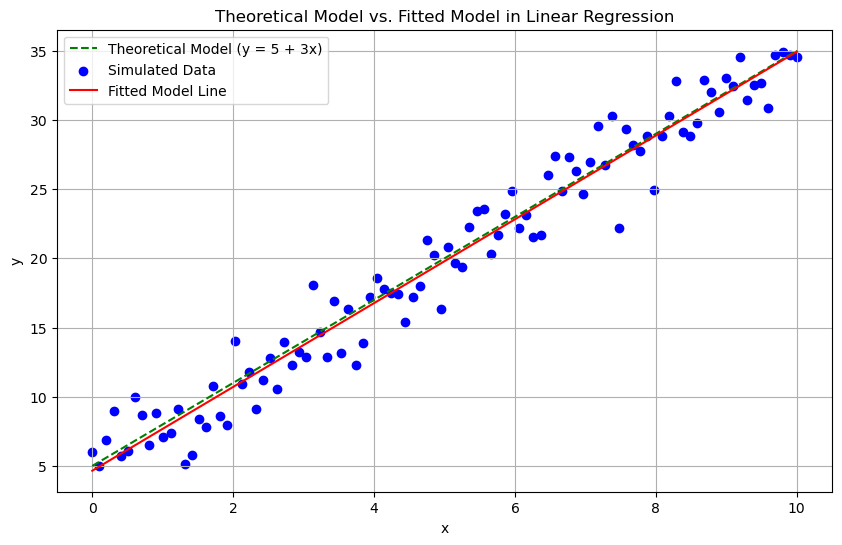

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Define theoretical model parameters
beta_0 = 5         # Intercept
beta_1 = 3         # Slope
sigma = 2          # Standard deviation of the error term
n_samples = 100    # Number of data points

# Generate predictor variable x and response variable y with noise
np.random.seed(42)
x = np.linspace(0, 10, n_samples)
error = np.random.normal(0, sigma, n_samples)
y = beta_0 + beta_1 * x + error

# Create a DataFrame
data = pd.DataFrame({'x': x, 'y': y})

# Fit the Simple Linear Regression model
model = smf.ols('y ~ x', data=data).fit()

# Theoretical line (without noise)
y_theoretical = beta_0 + beta_1 * x

# Predicted (fitted) line from sample data
y_fitted = model.predict(data)

# Plot the theoretical line, data points, and fitted line
plt.figure(figsize=(10, 6))
plt.plot(x, y_theoretical, color='green', linestyle='--', label='Theoretical Model (y = 5 + 3x)')
plt.scatter(data['x'], data['y'], color='blue', label='Simulated Data')
plt.plot(x, y_fitted, color='red', label='Fitted Model Line')

# Labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Theoretical Model vs. Fitted Model in Linear Regression")
plt.legend()
plt.grid(True)
plt.show()


the theoretical line represents the relationship between the variables without noise, it strictly follows the equation and does not vary depending on dataset

the fitted line only works for a given set of data, in this case, the dataset is sampled from the theoretical line thus they are similar. but the fitted line also includes normally distributed error thus it is not identical from the theoretical line

# 4 

in order to create the fitted model, we need to find beta_null and beta_one that minizes the sum of squared error, which 